<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/dane_wszystkie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


Liczba genów przed filtrowaniem: 28677


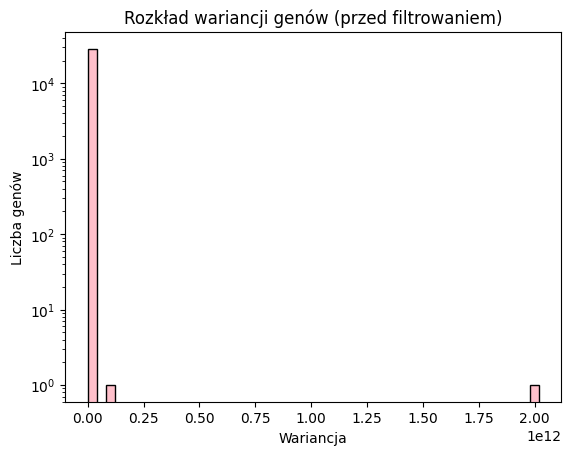

Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [ ]:

# Wczytanie danych z pliku Excel
file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')
# Wyświetlenie liczby wszystkich genów przed filtrowaniem
print(f"Liczba genów przed filtrowaniem: {len(df)}")

# Histogram pierwotnego rozkładu wariancji (przed filtrowaniem)
plt.hist(df['var'], bins=50, color='pink', edgecolor='black')
plt.title('Rozkład wariancji genów (przed filtrowaniem)')
plt.xlabel('Wariancja')
plt.ylabel('Liczba genów')
plt.yscale('log')
plt.show()

# Krok 1: Filtrowanie genów o niskiej wariancji
# Ustalmy próg wariancji na 10 - odrzucamy geny poniżej tej wartości
variance_threshold = 10

# Filtrowanie genów o wariancji poniżej progu
df_filtered = df[df['var'] >= variance_threshold]

# Zliczenie ilości genów dla lncRNA przed filtrowaniem
initial_counts = df['lncRNA'].value_counts()

# Zliczenie ilości genów dla lncRNA po filtrowaniu
filtered_counts = df_filtered['lncRNA'].value_counts()

# Obliczenie liczby usuniętych genów z lncRNA 0 i 1
removed_counts = initial_counts - filtered_counts

# Wyświetlenie liczby usuniętych genów osobno dla lncRNA = 0 i lncRNA = 1
removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

# Wyświetlenie łącznej liczby genów po filtrowaniu
total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")


In [ ]:
# Wybór kolumn zaczynających się od SRR7451446
data_values = df_filtered.loc[:, 'SRR7451446':]  # Wybieramy wszystkie kolumny od SRR7451446
# Lista do przechowywania wartości wskaźnika silhouette dla każdej liczby klastrów
silhouette_scores = []



# Klasteryzacja k-means dla liczby klastrów od 45 do 55
for n_clusters in range(45, 56):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data_values)

    # Dodanie informacji o klastrze do oryginalnych danych
    df_filtered[f'Cluster_{n_clusters}'] = clusters

    # Obliczenie wskaźnika silhouette dla każdego punktu
    silhouette_vals = silhouette_samples(scaled_data_values, clusters)

    # Dodanie wskaźnika silhouette do danych
    df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals

    # Liczba genów w każdym klastrze
    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()

    # Średnia wartość wskaźnika silhouette dla każdego klastra
    silhouette_per_cluster = df_filtered.groupby(f'Cluster_{n_clusters}')[f'Silhouette_{n_clusters}'].mean()

    # Wyświetlenie razem liczby genów i średniego wskaźnika silhouette dla każdego klastra
    print(f"\nPodsumowanie dla {n_clusters} klastrów:")
    for cluster_num in cluster_counts.index:
        count = cluster_counts[cluster_num]
        silhouette_avg = silhouette_per_cluster[cluster_num]
        # Wyświetlenie w oddzielnych liniach
        print(f"Klaster {cluster_num}:")
        print(f" Liczba genów = {count},")
        print(f" Średnia wartość silhouette = {silhouette_avg:.6f}")


<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 45 klastrów:
Klaster 17:
 Liczba genów = 1407,
 Średnia wartość silhouette = 0.166327
Klaster 35:
 Liczba genów = 1029,
 Średnia wartość silhouette = 0.122669
Klaster 3:
 Liczba genów = 847,
 Średnia wartość silhouette = 0.084875
Klaster 23:
 Liczba genów = 798,
 Średnia wartość silhouette = 0.073575
Klaster 32:
 Liczba genów = 793,
 Średnia wartość silhouette = 0.092071
Klaster 11:
 Liczba genów = 703,
 Średnia wartość silhouette = 0.093137
Klaster 26:
 Liczba genów = 694,
 Średnia wartość silhouette = 0.112277
Klaster 38:
 Liczba genów = 656,
 Średnia wartość silhouette = 0.121037
Klaster 21:
 Liczba genów = 652,
 Średnia wartość silhouette = 0.078989
Klaster 39:
 Liczba genów = 646,
 Średnia wartość silhouette = 0.139100
Klaster 4:
 Liczba genów = 644,
 Średnia wartość silhouette = 0.086052
Klaster 22:
 Liczba genów = 569,
 Średnia wartość silhouette = 0.019997
Klaster 41:
 Liczba genów = 560,
 Średnia wartość silhouette = 0.086975
Klaster 1:
 Liczba genów = 549,
 

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 46 klastrów:
Klaster 17:
 Liczba genów = 1337,
 Średnia wartość silhouette = 0.166045
Klaster 35:
 Liczba genów = 1014,
 Średnia wartość silhouette = 0.124044
Klaster 3:
 Liczba genów = 865,
 Średnia wartość silhouette = 0.081940
Klaster 23:
 Liczba genów = 790,
 Średnia wartość silhouette = 0.078176
Klaster 32:
 Liczba genów = 760,
 Średnia wartość silhouette = 0.081942
Klaster 1:
 Liczba genów = 701,
 Średnia wartość silhouette = 0.055874
Klaster 39:
 Liczba genów = 683,
 Średnia wartość silhouette = 0.140028
Klaster 26:
 Liczba genów = 663,
 Średnia wartość silhouette = 0.119142
Klaster 21:
 Liczba genów = 645,
 Średnia wartość silhouette = 0.082903
Klaster 38:
 Liczba genów = 640,
 Średnia wartość silhouette = 0.124261
Klaster 4:
 Liczba genów = 633,
 Średnia wartość silhouette = 0.119327
Klaster 11:
 Liczba genów = 603,
 Średnia wartość silhouette = 0.072009
Klaster 41:
 Liczba genów = 562,
 Średnia wartość silhouette = 0.066403
Klaster 22:
 Liczba genów = 552,
 

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 47 klastrów:
Klaster 17:
 Liczba genów = 1336,
 Średnia wartość silhouette = 0.158377
Klaster 35:
 Liczba genów = 991,
 Średnia wartość silhouette = 0.129461
Klaster 3:
 Liczba genów = 843,
 Średnia wartość silhouette = 0.078385
Klaster 32:
 Liczba genów = 772,
 Średnia wartość silhouette = 0.093340
Klaster 23:
 Liczba genów = 771,
 Średnia wartość silhouette = 0.075782
Klaster 1:
 Liczba genów = 697,
 Średnia wartość silhouette = 0.060598
Klaster 26:
 Liczba genów = 675,
 Średnia wartość silhouette = 0.116363
Klaster 4:
 Liczba genów = 670,
 Średnia wartość silhouette = 0.119499
Klaster 39:
 Liczba genów = 654,
 Średnia wartość silhouette = 0.143106
Klaster 21:
 Liczba genów = 641,
 Średnia wartość silhouette = 0.083516
Klaster 38:
 Liczba genów = 622,
 Średnia wartość silhouette = 0.124312
Klaster 11:
 Liczba genów = 586,
 Średnia wartość silhouette = 0.074444
Klaster 10:
 Liczba genów = 543,
 Średnia wartość silhouette = 0.111081
Klaster 22:
 Liczba genów = 539,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 48 klastrów:
Klaster 17:
 Liczba genów = 1321,
 Średnia wartość silhouette = 0.161142
Klaster 35:
 Liczba genów = 986,
 Średnia wartość silhouette = 0.135556
Klaster 3:
 Liczba genów = 843,
 Średnia wartość silhouette = 0.076530
Klaster 32:
 Liczba genów = 759,
 Średnia wartość silhouette = 0.095017
Klaster 23:
 Liczba genów = 758,
 Średnia wartość silhouette = 0.077379
Klaster 1:
 Liczba genów = 685,
 Średnia wartość silhouette = 0.059328
Klaster 39:
 Liczba genów = 669,
 Średnia wartość silhouette = 0.135189
Klaster 4:
 Liczba genów = 654,
 Średnia wartość silhouette = 0.115188
Klaster 26:
 Liczba genów = 652,
 Średnia wartość silhouette = 0.123321
Klaster 21:
 Liczba genów = 635,
 Średnia wartość silhouette = 0.080137
Klaster 38:
 Liczba genów = 617,
 Średnia wartość silhouette = 0.121690
Klaster 11:
 Liczba genów = 576,
 Średnia wartość silhouette = 0.072845
Klaster 22:
 Liczba genów = 534,
 Średnia wartość silhouette = 0.022729
Klaster 41:
 Liczba genów = 520,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 49 klastrów:
Klaster 17:
 Liczba genów = 1314,
 Średnia wartość silhouette = 0.161876
Klaster 35:
 Liczba genów = 978,
 Średnia wartość silhouette = 0.135414
Klaster 3:
 Liczba genów = 840,
 Średnia wartość silhouette = 0.076859
Klaster 23:
 Liczba genów = 758,
 Średnia wartość silhouette = 0.073924
Klaster 32:
 Liczba genów = 756,
 Średnia wartość silhouette = 0.097460
Klaster 1:
 Liczba genów = 673,
 Średnia wartość silhouette = 0.059567
Klaster 39:
 Liczba genów = 659,
 Średnia wartość silhouette = 0.129057
Klaster 4:
 Liczba genów = 657,
 Średnia wartość silhouette = 0.120610
Klaster 26:
 Liczba genów = 648,
 Średnia wartość silhouette = 0.125565
Klaster 21:
 Liczba genów = 630,
 Średnia wartość silhouette = 0.082405
Klaster 38:
 Liczba genów = 615,
 Średnia wartość silhouette = 0.123685
Klaster 11:
 Liczba genów = 571,
 Średnia wartość silhouette = 0.074778
Klaster 22:
 Liczba genów = 529,
 Średnia wartość silhouette = 0.020151
Klaster 10:
 Liczba genów = 518,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 50 klastrów:
Klaster 17:
 Liczba genów = 1294,
 Średnia wartość silhouette = 0.164336
Klaster 35:
 Liczba genów = 966,
 Średnia wartość silhouette = 0.135466
Klaster 3:
 Liczba genów = 836,
 Średnia wartość silhouette = 0.070426
Klaster 32:
 Liczba genów = 757,
 Średnia wartość silhouette = 0.095553
Klaster 23:
 Liczba genów = 750,
 Średnia wartość silhouette = 0.071787
Klaster 4:
 Liczba genów = 659,
 Średnia wartość silhouette = 0.118510
Klaster 39:
 Liczba genów = 644,
 Średnia wartość silhouette = 0.118391
Klaster 1:
 Liczba genów = 641,
 Średnia wartość silhouette = 0.059828
Klaster 26:
 Liczba genów = 641,
 Średnia wartość silhouette = 0.134625
Klaster 21:
 Liczba genów = 633,
 Średnia wartość silhouette = 0.078816
Klaster 11:
 Liczba genów = 599,
 Średnia wartość silhouette = 0.071088
Klaster 38:
 Liczba genów = 590,
 Średnia wartość silhouette = 0.128469
Klaster 22:
 Liczba genów = 532,
 Średnia wartość silhouette = 0.019182
Klaster 41:
 Liczba genów = 528,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 51 klastrów:
Klaster 17:
 Liczba genów = 1323,
 Średnia wartość silhouette = 0.157551
Klaster 35:
 Liczba genów = 952,
 Średnia wartość silhouette = 0.139061
Klaster 3:
 Liczba genów = 822,
 Średnia wartość silhouette = 0.077526
Klaster 32:
 Liczba genów = 745,
 Średnia wartość silhouette = 0.093447
Klaster 23:
 Liczba genów = 741,
 Średnia wartość silhouette = 0.068516
Klaster 1:
 Liczba genów = 667,
 Średnia wartość silhouette = 0.062345
Klaster 4:
 Liczba genów = 642,
 Średnia wartość silhouette = 0.087904
Klaster 21:
 Liczba genów = 619,
 Średnia wartość silhouette = 0.090242
Klaster 26:
 Liczba genów = 609,
 Średnia wartość silhouette = 0.141805
Klaster 39:
 Liczba genów = 605,
 Średnia wartość silhouette = 0.118604
Klaster 11:
 Liczba genów = 561,
 Średnia wartość silhouette = 0.070464
Klaster 10:
 Liczba genów = 535,
 Średnia wartość silhouette = 0.115018
Klaster 41:
 Liczba genów = 532,
 Średnia wartość silhouette = 0.075651
Klaster 22:
 Liczba genów = 532,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 52 klastrów:
Klaster 17:
 Liczba genów = 1143,
 Średnia wartość silhouette = 0.149991
Klaster 3:
 Liczba genów = 839,
 Średnia wartość silhouette = 0.083637
Klaster 1:
 Liczba genów = 814,
 Średnia wartość silhouette = 0.091426
Klaster 23:
 Liczba genów = 732,
 Średnia wartość silhouette = 0.076375
Klaster 35:
 Liczba genów = 716,
 Średnia wartość silhouette = 0.088403
Klaster 21:
 Liczba genów = 643,
 Średnia wartość silhouette = 0.105517
Klaster 4:
 Liczba genów = 622,
 Średnia wartość silhouette = 0.112560
Klaster 32:
 Liczba genów = 617,
 Średnia wartość silhouette = 0.058989
Klaster 39:
 Liczba genów = 616,
 Średnia wartość silhouette = 0.115268
Klaster 26:
 Liczba genów = 588,
 Średnia wartość silhouette = 0.132454
Klaster 11:
 Liczba genów = 576,
 Średnia wartość silhouette = 0.070427
Klaster 51:
 Liczba genów = 554,
 Średnia wartość silhouette = 0.035406
Klaster 22:
 Liczba genów = 526,
 Średnia wartość silhouette = 0.020498
Klaster 38:
 Liczba genów = 518,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 53 klastrów:
Klaster 17:
 Liczba genów = 1149,
 Średnia wartość silhouette = 0.148298
Klaster 3:
 Liczba genów = 852,
 Średnia wartość silhouette = 0.091066
Klaster 1:
 Liczba genów = 821,
 Średnia wartość silhouette = 0.094678
Klaster 35:
 Liczba genów = 739,
 Średnia wartość silhouette = 0.089692
Klaster 23:
 Liczba genów = 728,
 Średnia wartość silhouette = 0.071940
Klaster 4:
 Liczba genów = 694,
 Średnia wartość silhouette = 0.125208
Klaster 39:
 Liczba genów = 625,
 Średnia wartość silhouette = 0.141407
Klaster 26:
 Liczba genów = 623,
 Średnia wartość silhouette = 0.124110
Klaster 32:
 Liczba genów = 619,
 Średnia wartość silhouette = 0.072480
Klaster 21:
 Liczba genów = 615,
 Średnia wartość silhouette = 0.079483
Klaster 11:
 Liczba genów = 568,
 Średnia wartość silhouette = 0.071240
Klaster 38:
 Liczba genów = 562,
 Średnia wartość silhouette = 0.121301
Klaster 51:
 Liczba genów = 545,
 Średnia wartość silhouette = 0.033212
Klaster 22:
 Liczba genów = 539,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters
<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals



Podsumowanie dla 54 klastrów:
Klaster 17:
 Liczba genów = 1144,
 Średnia wartość silhouette = 0.145789
Klaster 3:
 Liczba genów = 817,
 Średnia wartość silhouette = 0.086162
Klaster 1:
 Liczba genów = 804,
 Średnia wartość silhouette = 0.092350
Klaster 23:
 Liczba genów = 722,
 Średnia wartość silhouette = 0.080613
Klaster 35:
 Liczba genów = 722,
 Średnia wartość silhouette = 0.090335
Klaster 21:
 Liczba genów = 636,
 Średnia wartość silhouette = 0.108440
Klaster 39:
 Liczba genów = 632,
 Średnia wartość silhouette = 0.123640
Klaster 4:
 Liczba genów = 621,
 Średnia wartość silhouette = 0.107856
Klaster 32:
 Liczba genów = 609,
 Średnia wartość silhouette = 0.062616
Klaster 26:
 Liczba genów = 592,
 Średnia wartość silhouette = 0.126268
Klaster 11:
 Liczba genów = 590,
 Średnia wartość silhouette = 0.072258
Klaster 51:
 Liczba genów = 522,
 Średnia wartość silhouette = 0.029219
Klaster 41:
 Liczba genów = 516,
 Średnia wartość silhouette = 0.068625
Klaster 38:
 Liczba genów = 509,
 Ś

<ipython-input-18-d60ed35a9e34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = clusters



Podsumowanie dla 55 klastrów:
Klaster 35:
 Liczba genów = 1121,
 Średnia wartość silhouette = 0.145339
Klaster 18:
 Liczba genów = 817,
 Średnia wartość silhouette = 0.066101
Klaster 26:
 Liczba genów = 789,
 Średnia wartość silhouette = 0.085550
Klaster 42:
 Liczba genów = 693,
 Średnia wartość silhouette = 0.090619
Klaster 34:
 Liczba genów = 689,
 Średnia wartość silhouette = 0.101444
Klaster 1:
 Liczba genów = 668,
 Średnia wartość silhouette = 0.084191
Klaster 11:
 Liczba genów = 630,
 Średnia wartość silhouette = 0.127101
Klaster 10:
 Liczba genów = 606,
 Średnia wartość silhouette = 0.066946
Klaster 14:
 Liczba genów = 589,
 Średnia wartość silhouette = 0.047359
Klaster 41:
 Liczba genów = 536,
 Średnia wartość silhouette = 0.081959
Klaster 13:
 Liczba genów = 526,
 Średnia wartość silhouette = 0.065165
Klaster 8:
 Liczba genów = 522,
 Średnia wartość silhouette = 0.112297
Klaster 39:
 Liczba genów = 521,
 Średnia wartość silhouette = 0.095027
Klaster 48:
 Liczba genów = 502,
 

<ipython-input-18-d60ed35a9e34>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Silhouette_{n_clusters}'] = silhouette_vals


In [ ]:
#zrobić wizualizacje (heatmapa + wykres)

In [38]:
# Klasteryzacja DBSCAN z większym eps i mniejszym min_samples
dbscan = DBSCAN(eps=3.0, min_samples=5, metric='euclidean')  # Zwiększamy wartość eps do 3.0 i zmniejszamy min_samples
dbscan_clusters = dbscan.fit_predict(scaled_data_values)

# Dodanie wyników DBSCAN do oryginalnych danych
df_filtered['DBSCAN_Cluster'] = dbscan_clusters

# Wyświetlenie liczby genów w każdym klastrze DBSCAN
print(f'\nLiczba genów w każdym klastrze DBSCAN:')
print(df_filtered['DBSCAN_Cluster'].value_counts())


Liczba genów w każdym klastrze DBSCAN:
DBSCAN_Cluster
 0    17782
-1     4450
 1        7
 3        5
 2        3
Name: count, dtype: int64


<ipython-input-38-14f9611c286a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DBSCAN_Cluster'] = dbscan_clusters


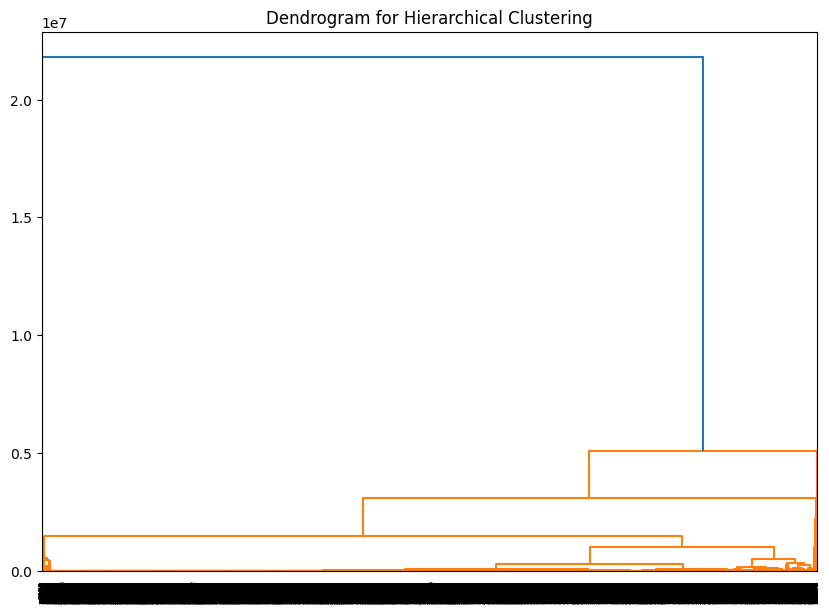

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [39]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Wybór kolumn z wartościami eksperymentalnymi (od SRR7451446 do SRR7451472)
data_values = df.loc[:, 'SRR7451446':'SRR7451472']

# 1. Wizualizacja dendrogramu w celu wyboru liczby klastrów
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(data_values, method='ward'))
plt.show()

# 2. Klasteryzacja z wybraną liczbą klastrów (np. 5 klastrów)
# Liczba klastrów może być wybrana na podstawie dendrogramu
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(data_values)

# Dodanie wyników klasteryzacji do oryginalnych danych
df['Hierarchical_Cluster'] = clusters

# Wyświetlenie liczby genów w każdym klastrze
print(f'\nLiczba genów w każdym klastrze Hierarchicznej Klasteryzacji:')
print(df['Hierarchical_Cluster'].value_counts())

poprawic dbscan, clustering, zrobic na danych bez usuwania wariancji co wyjdzie
